In [1]:
import numpy as np
np.random.seed(123)

- 데이터 로딩

In [2]:
from keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
len(x_train)

8982

In [4]:
len(x_test)

2246

In [5]:
x_train[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [6]:
y_train[0]

3

- 단어 인덱싱 : 토큰 사전 만들기

In [7]:
word_idx = reuters.get_word_index()
idx2word = dict([(value, key) for (key, value) in word_idx.items()])
word2idx = dict([(key, value) for (key, value) in word_idx.items()])
idx2word

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [8]:
decoded_news = ' '.join([idx2word.get(i-3, '.') for i in x_train[0]])
decoded_news

'. . . said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

- 원핫인코딩

In [9]:
def onehot(seq, dim=10000):
    results = np.zeros((len(seq), dim))
    for i, sequence in enumerate(seq):
        results[i, sequence] = 1
    return results

In [10]:
x_train = onehot(x_train)
x_test = onehot(x_test)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

- 목표변수(다중범주) 처리

In [12]:
from keras.utils.np_utils import to_categorical

one_hot_y_train = to_categorical(y_train)
one_hot_y_test = to_categorical(y_test)

In [13]:
one_hot_y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

- 모델 정의

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


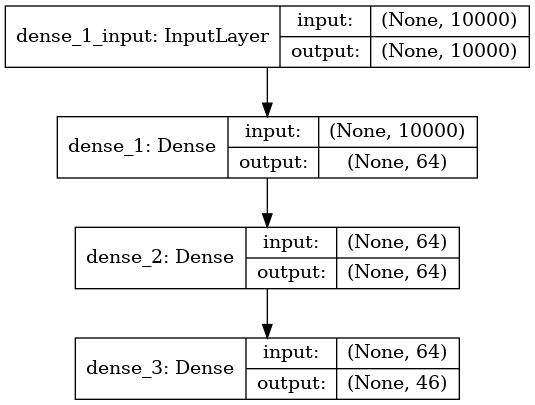

In [16]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

- 컴파일

In [17]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

- Validation Set 준비

In [18]:
x_val = x_train[:1000]
p_x_train = x_train[1000:]
y_val = one_hot_y_train[:1000]
p_y_train = one_hot_y_train[1000:]

In [19]:
len(p_x_train)

7982

-모델학습

In [20]:
history = model.fit(p_x_train, p_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 0s 45us/step - loss: 2.6823 - acc: 0.5269 - val_loss: 1.8035 - val_acc: 0.6380
Epoch 2/20
7982/7982 [==============================] - 0s 30us/step - loss: 1.4864 - acc: 0.7028 - val_loss: 1.3535 - val_acc: 0.6980
Epoch 3/20
7982/7982 [==============================] - 0s 30us/step - loss: 1.0899 - acc: 0.7704 - val_loss: 1.1582 - val_acc: 0.7560
Epoch 4/20
7982/7982 [==============================] - 0s 31us/step - loss: 0.8429 - acc: 0.8249 - val_loss: 1.0498 - val_acc: 0.7780
Epoch 5/20
7982/7982 [==============================] - 0s 30us/step - loss: 0.6632 - acc: 0.8637 - val_loss: 1.0045 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 0s 30us/step - loss: 0.5310 - acc: 0.8910 - val_loss: 0.9632 - val_acc: 0.7920
Epoch 7/20
7982/7982 [==============================] - 0s 30us/step - loss: 0.4281 - acc: 0.9121 - val_loss: 0.9191 - val_acc: 0.8130
Epoch 8

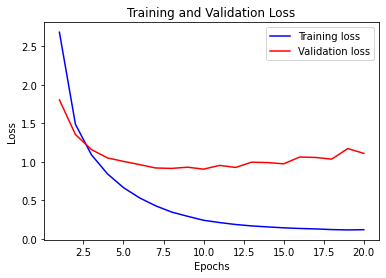

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs= range(1, len(loss) + 1)

plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

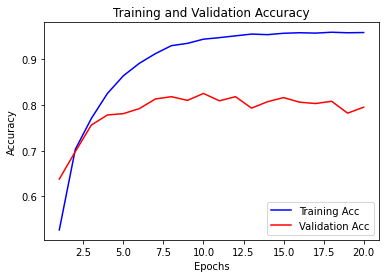

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'blue', label='Training Acc')
plt.plot(epochs, val_acc, 'red', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

- 과대적합을 줄이기 위해 Epoch을 줄이기

In [23]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.fit(p_x_train, p_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 0s 36us/step - loss: 2.5972 - acc: 0.4929 - val_loss: 1.7424 - val_acc: 0.6290
Epoch 2/9
7982/7982 [==============================] - 0s 30us/step - loss: 1.4308 - acc: 0.6974 - val_loss: 1.3372 - val_acc: 0.7050
Epoch 3/9
7982/7982 [==============================] - 0s 30us/step - loss: 1.0695 - acc: 0.7689 - val_loss: 1.1858 - val_acc: 0.7330
Epoch 4/9
7982/7982 [==============================] - 0s 30us/step - loss: 0.8445 - acc: 0.8186 - val_loss: 1.0626 - val_acc: 0.7660
Epoch 5/9
7982/7982 [==============================] - 0s 30us/step - loss: 0.6723 - acc: 0.8614 - val_loss: 0.9938 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 0s 30us/step - loss: 0.5347 - acc: 0.8906 - val_loss: 0.9526 - val_acc: 0.8060
Epoch 7/9
7982/7982 [==============================] - 0s 30us/step - loss: 0.4255 - acc: 0.9123 - val_loss: 0.9732 - val_acc: 0.7940
Epoch 8/9
7982

In [24]:
results

[1.017201076313946, 0.7787176966667175]

- 새로운 데이터에 대해 예측하기

In [25]:
pred = model.predict(x_test)
print(pred[0].shape)
print(np.sum(pred[0]))
print(np.argmax(pred[0]))

(46,)
1.0
3


- 출력층보다 작은 중간층을 사용하면 어떻게 될까?

In [26]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.fit(p_x_train, p_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_y_test)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 0s 35us/step - loss: 3.5367 - acc: 0.2209 - val_loss: 3.2579 - val_acc: 0.2560
Epoch 2/20
7982/7982 [==============================] - 0s 29us/step - loss: 3.0940 - acc: 0.2541 - val_loss: 2.9501 - val_acc: 0.2650
Epoch 3/20
7982/7982 [==============================] - 0s 30us/step - loss: 2.7964 - acc: 0.2727 - val_loss: 2.7327 - val_acc: 0.2840
Epoch 4/20
7982/7982 [==============================] - 0s 30us/step - loss: 2.5784 - acc: 0.2905 - val_loss: 2.5776 - val_acc: 0.2910
Epoch 5/20
7982/7982 [==============================] - 0s 30us/step - loss: 2.3960 - acc: 0.3058 - val_loss: 2.4502 - val_acc: 0.3140
Epoch 6/20
7982/7982 [==============================] - 0s 29us/step - loss: 2.2182 - acc: 0.3572 - val_loss: 2.2957 - val_acc: 0.3400
Epoch 7/20
7982/7982 [==============================] - 0s 29us/step - loss: 2.0318 - acc: 0.3796 - val_loss: 2.1307 - val_acc: 0.3510
Epoch 8

[1.6225790470068941, 0.6589492559432983]